In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5*x**2+ x + 2 +np.random.normal(0,1,size=100)

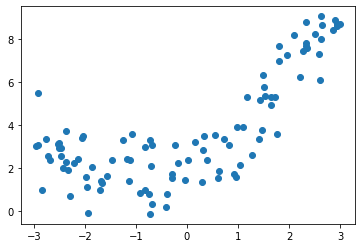

In [2]:
plt.scatter(x,y)

使用线性回归拟合

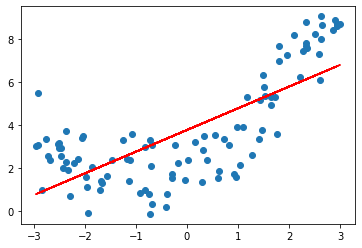

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
y_predict = lin_reg.predict(X)
plt.scatter(x,y)
plt.plot(X,y_predict,color='r')

添加一个特征来解决

In [6]:
(X**2).shape

(100, 1)

In [8]:
X2 = np.hstack([X,X**2])
X2.shape

(100, 2)

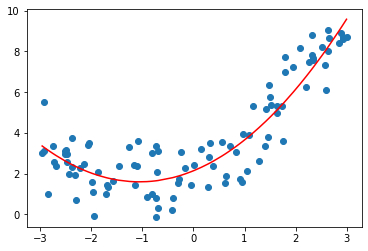

In [10]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2,y)
y_predict2 = lin_reg2.predict(X2)
plt.scatter(x,y)
# 由于x是乱的，所以应该进行排序
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color='r')

In [11]:
lin_reg2.coef_

array([1.02781568, 0.48600647])

In [12]:
lin_reg2.intercept_

2.139344964252014

多项式回归在机器学习算法上并没有新的地方，完全是使用线性回归的思路 他的关键在于为原来的样本，添加新的特征。而我们得到新的特征的方式是原有特征的多项式的组合。 采用这样的方式，我们就可以解决一些非线性的问题

与此同时需要主要，我们在上一章所讲的PCA是对我们的数据进行降维处理，而我们这一章所讲的多项式回归显然在做一件相反的事情，他让我们的数据升维，在升维之后使得我们的算法可以更好的拟合高纬度的数据

# scikit-learn中的多项式回归于pipeline 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5*x**2+ x + 2 +np.random.normal(0,1,size=100)

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X) 

In [16]:
X2.shape

(100, 3)

In [18]:
X2[:5,:]

array([[ 1.        , -1.82892555,  3.34496868],
       [ 1.        ,  1.41121463,  1.99152672],
       [ 1.        ,  1.47415001,  2.17311826],
       [ 1.        ,  2.26693261,  5.13898346],
       [ 1.        ,  2.23570144,  4.99836091]])

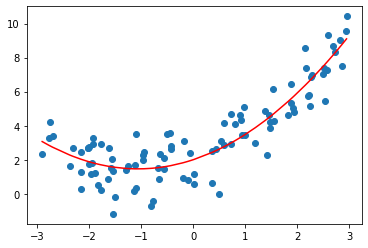

In [19]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2,y)
y_predict2 = lin_reg2.predict(X2)
plt.scatter(x,y)
# 由于x是乱的，所以应该进行排序
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color='r')

In [20]:
lin_reg2.coef_

array([0.        , 1.01064586, 0.47300153])

In [21]:
lin_reg2.intercept_

2.004365164499875

关于PolynomialFeatures

In [22]:
# 测试多维的数据集
X = np.arange(1,11).reshape(5,2)
X.shape

(5, 2)

In [23]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [25]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)
X2.shape

(5, 6)

In [26]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

将52的矩阵进行多项式转换后变成了56

第一列是1 对应的是0次幂
第二列和第三列对应的是原来的x矩阵，此时他有两列一次幂的项
第四列是原来数据的第一列平方的结果
第六列是原来数据的第二列平方的结果
第五列是原来数据的两列相乘的结果

可以想象如果将degree设置为3，那么将产生一下10个元素

1,X1,X2

X21,X22,X1*X2

X13,X23,X12X2,X22X1

也就是说PolynomialFeatures会穷举出所有的多项式组合

Pipline

pipline的英文名字是管道，那么 我们如何使用管道呢，先考虑我们多项式回归的过程

pipline 的作用就是把上面的三个步骤合并，使得我们不用一直重复这三步

In [27]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
# 一元二次方程
y = 0.5*x**2 + x + 2+np.random.normal(0,1,size=100)

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 传入每一步的对象名和类的实例化
poly_reg = Pipeline([
    ('poly',PolynomialFeatures(degree=2)),
    ('std_scaler',StandardScaler()),
    ('lin_reg',LinearRegression())
])

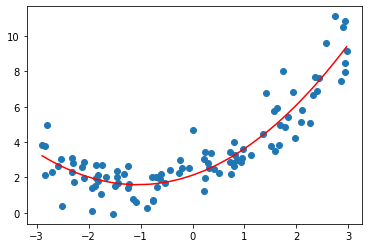

In [30]:
poly_reg.fit(X,y)
y_predict = poly_reg.predict(X)
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')

# 过拟合与欠拟合

In [34]:
# 直接使用线性回归，显然分数太低
lin_reg.score(X,y)

0.5561867493002018

使用均方误差来看拟合的结果，这是因为我们同样都是对一组数据进行拟合，所以使用不同的方法对数据进行拟合 得到的均方误差的指标是具有可比性的，（但是对于多项式回归来说，使用r2score进行衡量是没有问题的）

In [32]:
from sklearn.metrics import mean_squared_error
y_predict = lin_reg.predict(X)

In [33]:
mean_squared_error(y,y_predict)

2.6320795198448836

In [43]:
# 使用多项式回归
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# 使用Pipeline构建多项式回归
def PolynomialRegression(degree):
    # 传入每一步的对象名和类的实例化
    poly_reg = Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('lin_reg',LinearRegression())
    ])
    return poly_reg

In [44]:
poly_reg2 = PolynomialRegression(2)
poly_reg2.fit(X,y)
y2_predict = poly_reg2.predict(X)
mean_squared_error(y,y2_predict)

0.9339043983981532

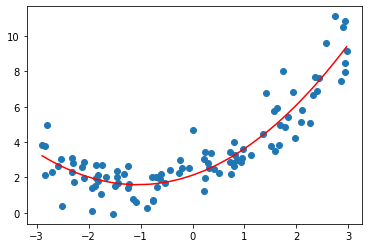

In [45]:
plt.scatter(x,y)
plt.plot(np.sort(x),y2_predict[np.argsort(x)],color='r')

使用更多的维度进行多项式回归

In [46]:
# 使用10个维度
poly_reg10 = PolynomialRegression(10)
poly_reg10.fit(X,y)
y10_predict = poly_reg10.predict(X)
mean_squared_error(y,y10_predict)

0.8162618381517871

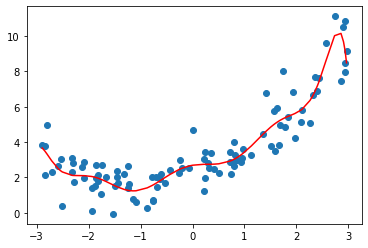

In [47]:
plt.scatter(x,y)
plt.plot(np.sort(x),y10_predict[np.argsort(x)],color='r')

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [49]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_predict = lin_reg.predict(X_test)

In [50]:
mean_squared_error(y_test,y_predict)

4.452640659412744

In [51]:
poly_reg2 = PolynomialRegression(2)
poly_reg2.fit(X_train,y_train)
y2_predict = poly_reg2.predict(X_test)
mean_squared_error(y_test,y2_predict)

1.3763437900402606

In [53]:
poly_reg10 = PolynomialRegression(10)
poly_reg10.fit(X_train,y_train)
y10_predict = poly_reg10.predict(X_test)
mean_squared_error(y_test,y10_predict)

1.6042388987311318

使用degree=10的时候得到的均方误差要大于degree=2的时候，说明当degree等于10的时候，他的模型泛化能力变弱了

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10)
X_train.shape

(75, 1)

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def plot_learning_curve(algo,X_train,X_test,y_train,y_test):
    train_score = []
    test_score = []
    # 计算学习曲线数据
    for i in range(1,len(X_train)+1):
        algo.fit(X_train[:i],y_train[:i])
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i],y_train_predict))
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test,y_test_predict))
    # 绘制学习曲线
    plt.plot([i for i in range(1,len(X_train)+1)],np.sqrt(train_score),label = 'train')
    plt.plot([i for i in range(1,len(X_train)+1)],np.sqrt(test_score),label = 'test')
    plt.axis([0,len(X_train)+1,0,4])
    plt.legend()


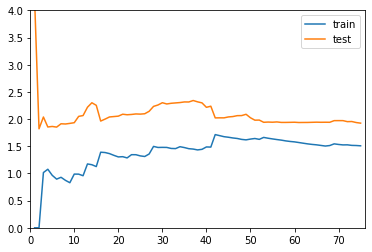

In [63]:
plot_learning_curve(LinearRegression(),X_train,X_test,y_train,y_test)

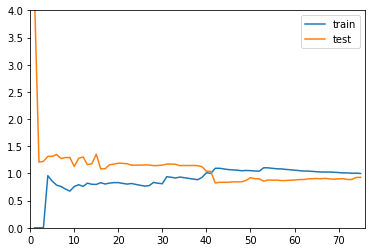

In [64]:
poly_reg2 = PolynomialRegression(2)
plot_learning_curve(poly_reg2,X_train,X_test,y_train,y_test)

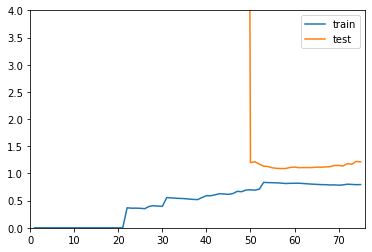

In [65]:
# 使用20阶多项式回归
poly20_reg = PolynomialRegression(20)
plot_learning_curve(poly20_reg,X_train,X_test,y_train,y_test)


In [4]:
import numpy as np
from sklearn import datasets

In [5]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state =666)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
best_score,best_k,best_p = 0,0,0
# k为k近邻中的寻找k个最近元素
for k in range(2,11):
    # p为明科夫斯基距离的p
    for p in range(1,6):
        knn_clf = KNeighborsClassifier(weights='distance',n_neighbors=k,p=p)
        knn_clf.fit(X_train,y_train)
        score = knn_clf.score(X_test,y_test)
        if score > best_score:
            best_score,best_k,best_p = score,k,p
print("Best_score = ",best_score)
print("Best_k = ",best_k)
print("Best_p = ",best_p)

Best_score =  0.9860917941585535
Best_k =  3
Best_p =  4


使用交叉验证

In [16]:
# 使用sklearn提供的交叉验证
from sklearn.model_selection import cross_val_score
knn_clf = KNeighborsClassifier()
# 返回的是一个数组，有五个元素，说明cross_val_score方法默认将我们的数据集分成了五份
# 这五份数据集进行交叉验证后产生了这五个结果
# cv默认为5，可以修改改参数，修改修改不同分数的数据集
cross_val_score(knn_clf,X_train,y_train,cv=5)

array([0.99537037, 0.98148148, 0.97685185, 0.97674419, 0.97209302])

In [17]:
# 使用交叉验证的方式来进行调参的过程
best_score,best_k,best_p = 0,0,0
# k为k近邻中的寻找k个最近元素
for k in range(2,11):
    # p为明科夫斯基距离的p
    for p in range(1,6):
        knn_clf = KNeighborsClassifier(weights='distance',n_neighbors=k,p=p)
        scores = cross_val_score(knn_clf,X_train,y_train)
        score = np.mean(scores)
        if score > best_score:
            best_score,best_k,best_p = score,k,p
print("Best_score = ",best_score)
print("Best_k = ",best_k)
print("Best_p = ",best_p)

Best_score =  0.9851507321274763
Best_k =  2
Best_p =  2


使用交叉验证得到的最好参数Best_score并不是真正的最好的结果，我们使用这种方式只是为了拿到 一组超参数而已，拿到这组超参数后我们就可以训练出我们的最佳模型

In [18]:
best_knn_clf = KNeighborsClassifier(weights='distance',n_neighbors=2,p=2)
best_knn_clf.fit(X_train,y_train)
best_knn_clf.score(X_test,y_test)

0.980528511821975

回顾网格搜索

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(2,11)],
        'p':[i for i in range(1,6)]
    }
]

grid_search = GridSearchCV(knn_clf,param_grid,verbose=1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:   47.0s finished


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=10, p=5,
                                            weights='distance'),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             verbose=1)

In [21]:
grid_search.best_score_

0.9851507321274763

In [22]:
grid_search.best_params_

{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}

In [23]:
best_knn_clf = grid_search.best_estimator_
best_knn_clf.score(X_test,y_test)

0.980528511821975

# 编程实现岭回归

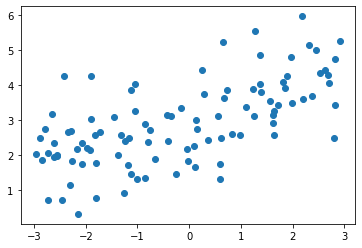

In [26]:
import numpy as np
import matplotlib.pyplot as plt
# 模型样本
np.random.seed(42)
x = np.random.uniform(-3.0,3.0,size=100)
X = x.reshape(-1,1)
y = 0.5 * x + 3 + np.random.normal(0,1,size=100)
# 绘制样本曲线
plt.scatter(x,y)

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
# 定义多项式回归函数
def PolynomialRegression(degree):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('lin_reg',LinearRegression())
    ])

In [28]:
from sklearn.model_selection import train_test_split
# 分割数据集
np.random.seed(666)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [29]:
from sklearn.metrics import mean_squared_error
# 多项式回归对样本进行训练，使用20个维度
poly20_reg = PolynomialRegression(20)
poly20_reg.fit(X_train,y_train)
y20_predict = poly20_reg.predict(X_test)
mean_squared_error(y_test,y20_predict)

167.9401085999025

In [30]:
# 定义绘图模型
def plot_module(module):
    X_plot = np.linspace(-3,3,100).reshape(100,1)
    y_plot = module.predict(X_plot)
    plt.scatter(x,y)
    plt.plot(X_plot[:,0],y_plot,color='r')
    plt.axis([-3,3,0,6])

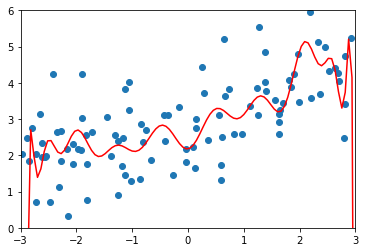

In [31]:
# 绘制模型曲线--过拟合（两段有极端的情况）
plot_module(poly20_reg)

# 使用岭回归

In [32]:
from sklearn.linear_model import Ridge
def RidgeRegression(degree,alpha):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('ridge_reg',Ridge(alpha=alpha))
    ])

In [33]:
# 注意alpha后面的参数是所有theta的平方和，而对于多项式回归来说，岭回归之前得到的θ都非常大
# 所以为了限制让他们比较小，我们前面系数可以取的小一些
ridge1_reg = RidgeRegression(degree=20,alpha=0.00001)
ridge1_reg.fit(X_train,y_train)
ridge1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test,ridge1_predict)

1.3874378026530747

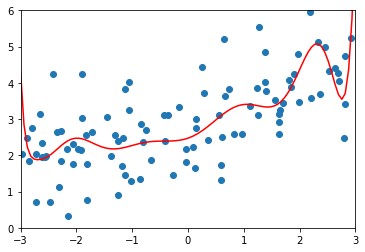

In [34]:
# 通过使用岭回归，使得我们的均方误差小了非常多,曲线也缓和了非常多
plot_module(ridge1_reg)

In [35]:
ridge2_reg = RidgeRegression(degree=20,alpha=1)
ridge2_reg.fit(X_train,y_train)
ridge2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test,ridge2_predict)

1.1888759304218461

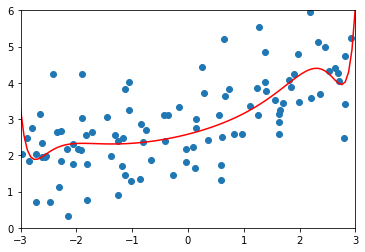

In [36]:
# 让ridge2_reg 的alpha值等于1，均差误差更加的缩小，并且曲线越来越趋近于一根倾斜的直线
plot_module(ridge2_reg)

In [37]:
ridge3_reg = RidgeRegression(degree=20,alpha=100)
ridge3_reg.fit(X_train,y_train)
ridge3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test,ridge3_predict)

1.3196456113086197

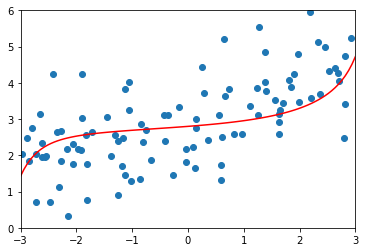

In [38]:
# 得到的误差依然是比较小，但是比之前的1.18大了些，说明正则化做的有些过头了
plot_module(ridge3_reg)

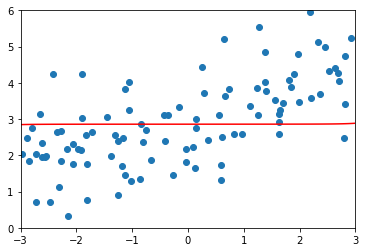

In [39]:
ridge4_reg = RidgeRegression(degree=20,alpha=100000)
ridge4_reg.fit(X_train,y_train)
ridge4_predict = ridge4_reg.predict(X_test)
mean_squared_error(y_test,ridge4_predict)
# 当alpha非常大，我们的模型实际上相当于就是在优化θ的平方和这一项，使得其最小（因为MSE的部分相对非常小）
# 而使得θ的平方和最小，就是使得每一个θ都趋近于0，这个时候曲线就趋近于一根直线了
plot_module(ridge4_reg) 

# LASSO

In [40]:
from sklearn.linear_model import Lasso
def LassoRegression(degree,alpha):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scatter",StandardScaler()),
        ("lasso_reg",Lasso(alpha=alpha))
    ])

In [43]:
# 这里穿的alpha起始值比岭回归的时候大了很多，是由于现在是绝对值
lasso1_reg = LassoRegression(degree=20,alpha=0.01)
lasso1_reg.fit(X_train,y_train)
lasso1_predict = lasso1_reg.predict(X_test)
mean_squared_error(lasso1_predict,y_test)

1.149608084325997

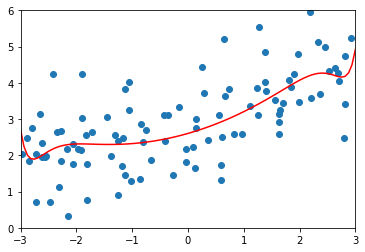

In [44]:
plot_module(lasso1_reg)

In [45]:
# 增大alpha继续试验
lasso2_reg = LassoRegression(degree=20,alpha=0.1)
lasso2_reg.fit(X_train,y_train)
lasso2_predict = lasso2_reg.predict(X_test)
mean_squared_error(lasso2_predict,y_test)

1.1213911351818648

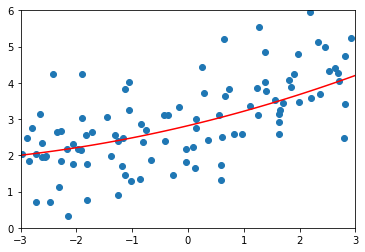

In [46]:
# 非常接近一根直线
plot_module(lasso2_reg)

In [47]:
# 增大alpha继续试验
lasso3_reg = LassoRegression(degree=20,alpha=1)
lasso3_reg.fit(X_train,y_train)
lasso3_predict = lasso3_reg.predict(X_test)
mean_squared_error(lasso3_predict,y_test)

1.8408939659515595

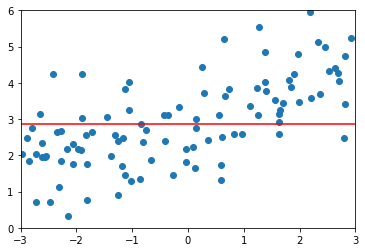

In [48]:
# alpha=1的时候正则化已经过头了
plot_module(lasso3_reg)

α=100的时候，使用Ridge的得到的模型曲线依旧是一根曲线，事实上，使用Ridge很难得到一根倾斜的直线，他一直是弯曲的形状

但是使用LASSO的时候，当α=0.1，虽然得到的依然是一根曲线，但是他显然比Radge的程度更低，更像一根直线

这是因为LASSO趋向于使得一部分theta值为0（而不是很小的值），所以可以作为特征选择用，LASSO的最后两个字母SO就是Selection Operator的首字母缩写 使用LASSO的过程如果某一项θ等于0了，就说明LASSO Regression认为这个θ对应的特征是没有用的，剩下的那些不等于0的θ就说明LASSO Regression认为对应的这些特征有用，所以他可以当做特征选择用